In [114]:
#MONTE CARLO LEARNING FOR BLACKJACK
#AUTHOR: Ian McAtee
#DATE: 12/20/2021

#Import OpenAI Gym and set the environment to blackjack
import gym
env = gym.make('Blackjack-v1')

In [115]:
#FUNCTION TO GENERATE BLACKJACK EPISODE

import numpy as np

def genEpisodeStochastic(env):
    #Initialize episode as empty list
    episode = []
    #Reset the blackjack environment
    state = env.reset() 
    while True:
        #Set probabilities, i.e. hit w/ 80% chance, stay w/ 20% and vice versa depending if under/over 17
        probs = [0.8, 0.2] if state[0] > 18 else [0.2, 0.8]
        #Choose hit or stay based on probabilities
        action = np.random.choice([0,1], p=probs)
        #Apply action to environemnt, get next state, reward, and is done signal
        nextState, reward, done, info = env.step(action)
        #Append tuple to episode
        episode.append((state, action, reward))
        #Set state to next state
        state = nextState
        #Break if done with blackjack hand
        if done:
            break
    return episode


In [116]:
#MONTE CARLO LEARNING FUNCTION

def MCLearn(env,numHands):
    print('Monte Carlo Learning In Progress...')
    
    #Initilize Q-table, returns, and policy to emputy dictionary
    Q = dict()
    returns = dict()
    policy = dict()
    
    for i in range(numHands):
        #Generate episode (i.e. a blackjack round)
        episode = genEpisodeStochastic(env)
        
        for j in range(len(episode)):
            #Get state, action, reward from this sample in the episode
            state = episode[j][0] 
            action = episode[j][1] 
            reward = episode[j][2]
            
            #If first time encountering a state, set returns for both actions to null array
            if state not in returns:
                returns[state] = dict((action, []) for action in [0,1])
            
            #Append the reward to the returns of that state and action 
            returns[state][action].append(reward)
            #print('Return: ',returns[state][action])
            
            #Initialize the Q-table to zero if state has not been encountered
            if state not in Q:
                Q[state] = dict((action, 0.0) for action in [0,1])
            
            #Set the Q-value of the action-state pair to the average of all returns thus far
            Q[state][action] = np.average(returns[state][action])
            #print('Q: ', Q[state])
            
            #Update the policy via a greedy query of the q-table
            maxQ = max(Q[state].values())
            for k in [0,1]:
                if Q[state][k] == maxQ:
                    policy[state] = k
            #print('Policy: ', policy[state])
        
        #Display MC Learning progress
        if i%100000 == 0:
            print('Done with hand: ',i)
            
    return policy
        

In [117]:
#PERFORM MONTE CARLO LEARNING
policy = MCLearn(env,2000000) #Number is number of blackjack hands to play to learn

Monte Carlo Learning In Progress...
Done with hand:  0
Done with hand:  100000
Done with hand:  200000
Done with hand:  300000
Done with hand:  400000
Done with hand:  500000
Done with hand:  600000
Done with hand:  700000
Done with hand:  800000
Done with hand:  900000
Done with hand:  1000000
Done with hand:  1100000
Done with hand:  1200000
Done with hand:  1300000
Done with hand:  1400000
Done with hand:  1500000
Done with hand:  1600000
Done with hand:  1700000
Done with hand:  1800000
Done with hand:  1900000


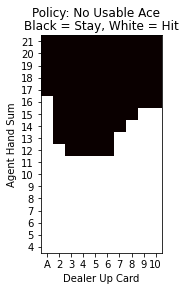

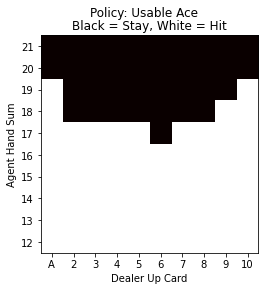

In [118]:
#DISPLAY THE MC LEARNED POLICY

import matplotlib.pyplot as plt

#Initialize some necessary variables
possSumNoAce = range(4,22)
possSumAce = range(12,22)
possUpCard = range(1,11)

#Initialize the no usable and usable ace policy table matrices
policyTableAce = [[str(0) for i in possUpcard] for j in possSumAce]
policyTableNoAce = [[str(0) for i in possUpcard] for j in possSumNoAce]

#Format the policy table for no usable ace
for i in possSumNoAce:
    for j in possUpCard:
        state = (i,j,False)
        policyTableNoAce[i-4][j-1] = policy[state]

#Format the policy table for usable ace
for i in possSumAce:
    for j in possUpCard:
        state = (i,j,True)
        policyTableAce[i-12][j-1] = policy[state]


#Plot the no usable ace policy
plt.imshow(policyTableNoAce, cmap='hot', interpolation='nearest')
plt.gca().invert_yaxis()
plt.suptitle('Policy: No Usable Ace')
plt.title('Black = Stay, White = Hit')
plt.xticks(range(0,10),['A','2','3','4','5','6','7','8','9','10'])
plt.yticks(range(0,18),range(4,22))
plt.xlabel('Dealer Up Card')
plt.ylabel('Agent Hand Sum')
plt.show()   

#Plot the usable ace policy
plt.imshow(policyTableAce, cmap='hot', interpolation='nearest')
plt.gca().invert_yaxis()
plt.suptitle('Policy: Usable Ace')
plt.title('Black = Stay, White = Hit')
plt.xticks(range(0,10),['A','2','3','4','5','6','7','8','9','10'])
plt.yticks(range(0,10),range(12,22))
plt.xlabel('Dealer Up Card')
plt.ylabel('Agent Hand Sum')
plt.show()  

In [119]:
#TEST THE MC POLICY AGAINST A HEURISTIC (HIT < 17) POLICY 

#Number of blackjack hands to play 
numHands = 100000

#Initialize the number of wins
winsH = 0
winsMC = 0

#Play number of hands with heuristic policy, tally number of wins
for i in range(numHands):
    state = env.reset()
    done = False
    while not done:
        if state[0] < 17:
            action = 1
        else:
            action = 0
        nextState, reward, done, _ = env.step(action)
        state = nextState
        if reward == 1.0:
            winsH += 1

#Play number of hands with MC policy, tally number of wins
for i in range(numHands):
    state = env.reset()
    done = False
    while not done:
        action = policy[state]
        nextState, reward, done, _ = env.step(action)
        state = nextState
        if reward == 1.0:
            winsMC += 1

#Display wins for each policy
print('Heuristic Wins: ', winsH)
print('MC Wins: ', winsMC)


Heuristic Wins:  41128
MC Wins:  43327
